In [1]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# add parent folder of notebook to path
sys.path.append(os.path.abspath(".."))



In [2]:
import Pipeline.results 
import importlib
from utils.helperfunctions import plot_roc_curve, logRegOddsRatios

          GameID posteam  Yards.Gained  rushing_yards  passing_yards  \
0     2009091000     PIT           476             36            350   
1     2009091000     TEN           425             86            279   
2     2009091300     ATL           312             72            229   
3     2009091300     MIA           413             96            211   
4     2009091301     BAL           600            198            318   
...          ...     ...           ...            ...            ...   
4091  2017010113      LA           283             52            156   
4092  2017010114      KC           426            103            264   
4093  2017010114      SD           583            129            269   
4094  2017010115     SEA           420             90            302   
4095  2017010115      SF           390             70            245   

      return_yards  
0              132  
1               70  
2               31  
3              123  
4               79  
...      

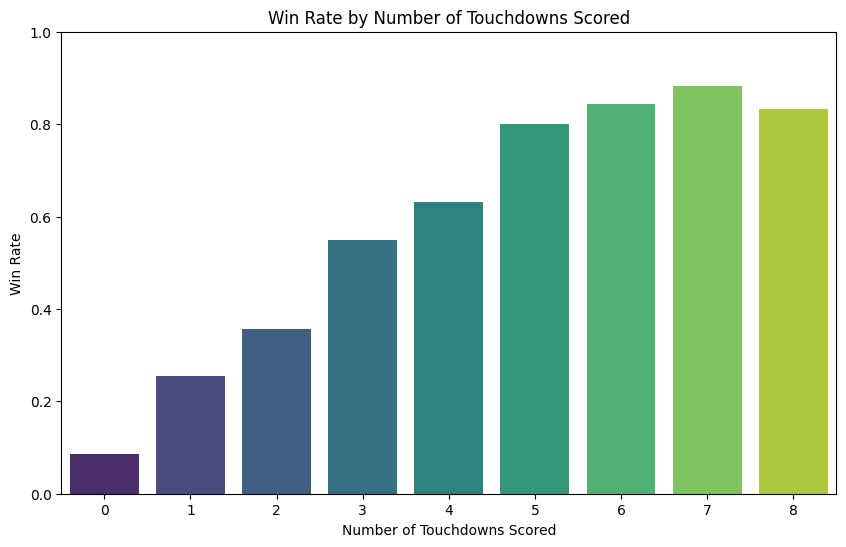

In [3]:
plt.figure(figsize=(10,6))
sns.barplot(data=Pipeline.results.touchdown_win, x='Touchdown', y='Win', palette='viridis')
plt.xlabel('Number of Touchdowns Scored')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Touchdowns Scored')
plt.ylim(0,1)
plt.show()

In [4]:
Pipeline.results.prediction.to_csv("../Prediction.csv", index=False)



In [5]:
df = pd.read_csv("../Prediction.csv")
df

,posteam_A,Season_A,posteam_B,Season_B,proba_A_wins,winner,predicted_winner_team
0,SF,2011,IND,2009,0.667446,A,SF
1,CAR,2015,SF,2011,0.471530,B,SF
2,NE,2011,CAR,2015,0.387822,B,CAR
3,NO,2009,DEN,2012,0.307596,B,DEN
4,NE,2016,SF,2011,0.643674,A,NE
5,DEN,2012,GB,2011,0.601578,A,DEN
6,GB,2011,NO,2009,0.497885,A,GB
7,NE,2010,GB,2014,0.567727,A,NE
8,IND,2009,NE,2011,0.317841,B,NE
9,GB,2014,IND,2009,0.753039,A,GB


In [6]:
Pipeline.results.matchupsfull

,index_A,GameID,posteam_A,Win_A,Season_A,index_B,posteam_B,Win_B,Season_B,InterceptionThrown,...,SacksAllowed_B,PosTeamScore_B,DefTeamScore_B,FirstDown_B,CompletionPercentage_B,total.Yards.Gained_B,rushing_yards_B,passing_yards_B,return_yards_allowed_B,win_B
0,0,2009091000,PIT,0,2009,1,TEN,0,2009,1.1250,...,0.8750,21.1875,24.9375,20.9375,0.552990,467.9375,170.0625,198.0000,102.1250,0.4375
1,2,2009091300,ATL,1,2009,3,MIA,0,2009,1.1250,...,2.1875,21.5000,24.1875,24.6250,0.603508,468.1250,139.1875,219.4375,121.6875,0.3750
2,4,2009091301,BAL,1,2009,5,KC,0,2009,0.8125,...,2.8750,17.7500,25.5625,22.5625,0.547114,445.7500,120.0000,205.1875,125.5000,0.1875
3,6,2009091302,CAR,0,2009,7,PHI,1,2009,1.3125,...,2.6875,26.0625,20.5625,21.9375,0.608151,466.5000,103.9375,283.8125,94.9375,0.6250
4,8,2009091303,CIN,0,2009,9,DEN,1,2009,0.8125,...,2.1875,19.6250,20.0000,23.3750,0.596475,452.8750,115.3750,243.8125,102.0000,0.4375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,4086,2017010111,NYG,1,2016,4087,WAS,0,2016,1.0625,...,1.4375,24.6250,23.5000,24.6875,0.637967,470.8125,107.0625,316.0625,56.6875,0.5000
2044,4088,2017010112,DEN,1,2016,4089,OAK,0,2016,0.6875,...,1.2500,25.4375,24.0000,24.6875,0.608500,455.1250,121.7500,271.5625,64.0625,0.6250
2045,4090,2017010113,ARI,1,2016,4091,LA,0,2016,1.2500,...,3.4375,13.8125,24.3125,22.8125,0.566389,357.8125,82.1250,215.3125,80.4375,0.2500
2046,4092,2017010114,KC,1,2016,4093,SD,0,2016,0.5625,...,2.4375,24.8125,25.3750,23.5000,0.590324,414.8750,94.8125,279.6250,51.4375,0.2500


In [7]:
Pipeline.results.Bestmatchup

,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,...,total.Yards.Gained,total.Yards.Gained_B,rushing_yards,rushing_yards_B,passing_yards,passing_yards_B,return_yards_allowed,return_yards_allowed_B,win,win_B
0,SF,2011,IND,2009,0.3750,1.2500,1.0000,0.7500,2.1875,3.2500,...,401.7500,466.0000,128.1875,82.5000,208.5000,292.8125,82.1250,96.0000,0.8125,0.8125
1,CAR,2015,SF,2011,0.6875,0.3750,0.9375,1.0000,3.5625,2.1875,...,424.3750,401.7500,144.0625,128.1875,248.4375,208.5000,46.5000,82.1250,0.8125,0.8125
2,NE,2011,CAR,2015,0.8125,0.6875,0.8125,0.9375,3.6875,3.5625,...,513.9375,424.3750,111.1250,144.0625,333.3750,248.4375,78.5000,46.5000,0.8125,0.8125
3,NO,2009,DEN,2012,0.8125,0.7500,1.5625,1.1250,3.8750,3.4375,...,523.9375,460.1875,132.7500,116.3750,285.6875,304.5000,111.6875,47.3125,0.8125,0.8125
4,NE,2016,SF,2011,0.1250,0.3750,1.4375,1.0000,3.2500,2.1875,...,448.3750,401.7500,118.3750,128.1875,292.6250,208.5000,42.8750,82.1250,0.8125,0.8125
5,DEN,2012,GB,2011,0.7500,0.6250,1.1250,0.6875,3.4375,3.8125,...,460.1875,475.0000,116.3750,93.3750,304.5000,315.4375,47.3125,82.7500,0.8125,0.8125
6,GB,2011,NO,2009,0.6250,0.8125,0.6875,1.5625,3.8125,3.8750,...,475.0000,523.9375,93.3750,132.7500,315.4375,285.6875,82.7500,111.6875,0.8125,0.8125
7,NE,2010,GB,2014,0.3125,0.5000,0.4375,1.0625,3.6250,3.3750,...,456.6250,448.3125,124.6875,122.2500,261.2500,285.2500,78.3125,48.6875,0.8125,0.7500
8,IND,2009,NE,2011,1.2500,0.8125,0.7500,0.8125,3.2500,3.6875,...,466.0000,513.9375,82.5000,111.1250,292.8125,333.3750,96.0000,78.5000,0.8125,0.8125
9,GB,2014,IND,2009,0.5000,1.2500,1.0625,0.7500,3.3750,3.2500,...,448.3125,466.0000,122.2500,82.5000,285.2500,292.8125,48.6875,96.0000,0.7500,0.8125


In [8]:
Pipeline.results.results

[('Decision Tree accuracy', 0.651219512195122),
 ('LogReg accuracy:', 0.6634146341463415),
 ('SVM accuracy:', 0.6439024390243903),
 ('Best MLP accuracy out of 10 tries:', 0.6317073170731707)]

In [9]:
recall_score(Pipeline.results.y_test, Pipeline.results.y_pred_logreg)

0.6868686868686869

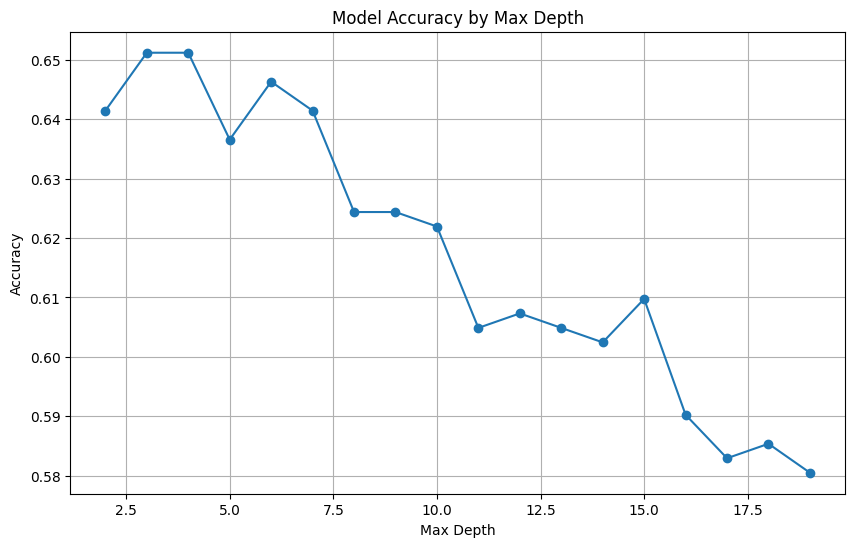

In [10]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(Pipeline.results.X_train_scaled, Pipeline.results.y_train)
    acc = accuracy_score(Pipeline.results.y_test, model.predict(Pipeline.results.X_test_scaled))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

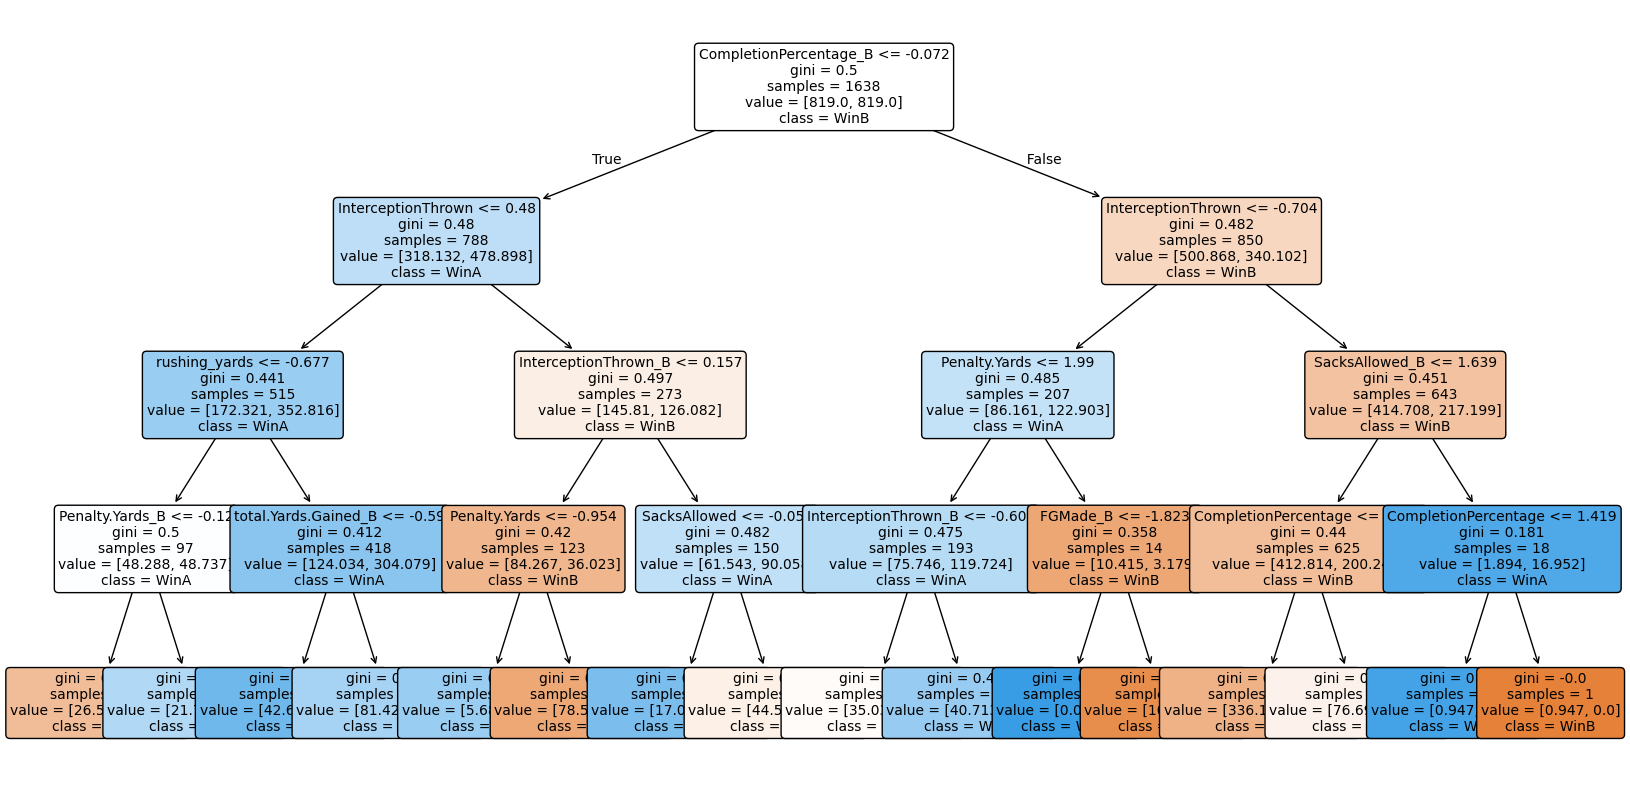

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    Pipeline.results.tree,
    feature_names=Pipeline.results.train_cols,
    class_names=['WinB', 'WinA'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()


In [12]:
feature_importances = pd.Series(Pipeline.results.tree.feature_importances_, index=Pipeline.results.train_cols)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

InterceptionThrown        0.252431
CompletionPercentage_B    0.232758
InterceptionThrown_B      0.108653
SacksAllowed_B            0.088454
CompletionPercentage      0.072270
Penalty.Yards             0.068364
rushing_yards             0.050426
SacksAllowed              0.043526
Penalty.Yards_B           0.030816
total.Yards.Gained_B      0.030580
FGMade_B                  0.021722
FGMade                    0.000000
FirstDown                 0.000000
PuntBlocked               0.000000
Fumble                    0.000000
return_yards_allowed      0.000000
Fumble_B                  0.000000
total.Yards.Gained        0.000000
passing_yards             0.000000
PuntBlocked_B             0.000000
FirstDown_B               0.000000
rushing_yards_B           0.000000
passing_yards_B           0.000000
return_yards_allowed_B    0.000000
dtype: float64


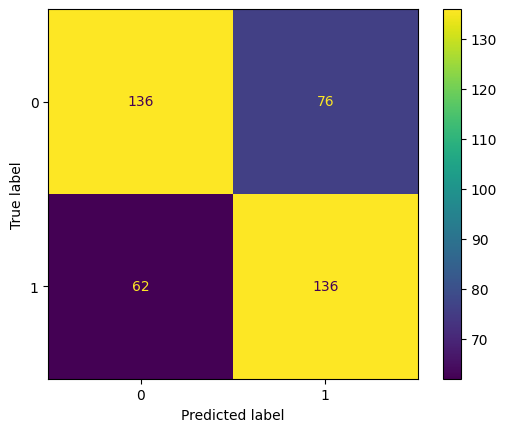

In [13]:
cm = confusion_matrix(Pipeline.results.y_test, Pipeline.results.y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

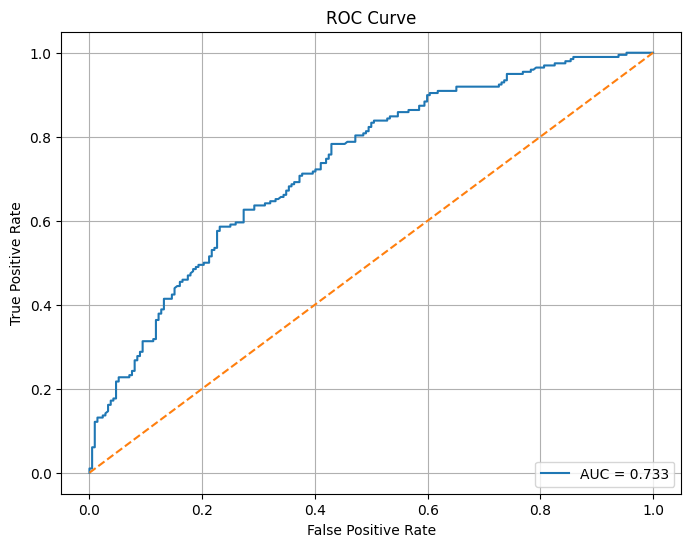

In [14]:
plot_roc_curve( Pipeline.results.best_model, Pipeline.results.X_test_scaled, Pipeline.results.y_test)

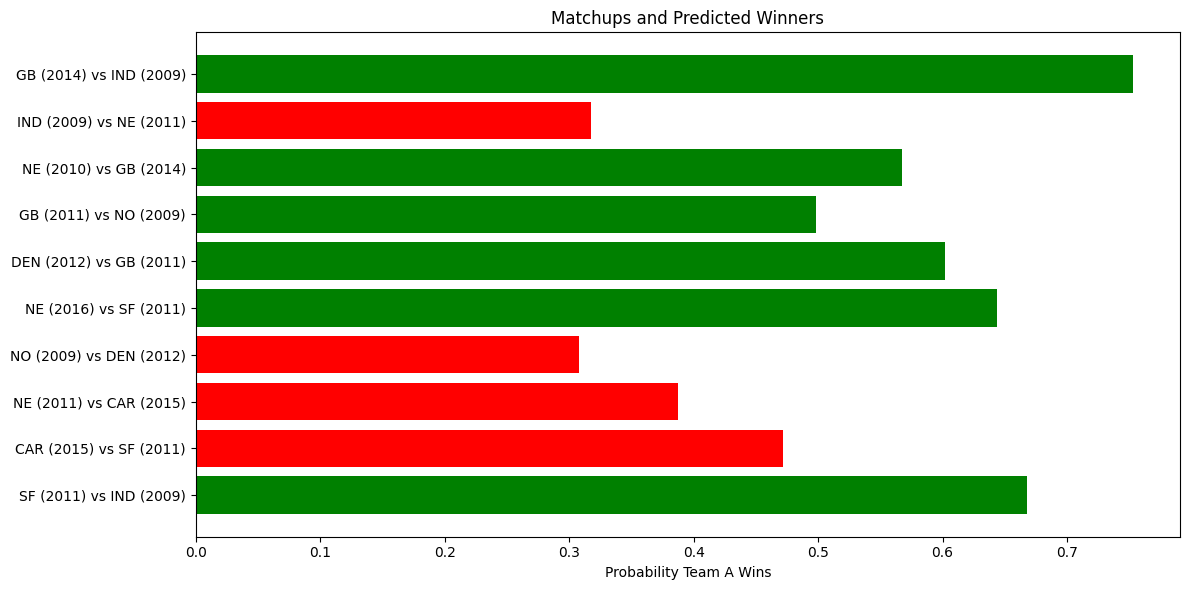

In [ ]:
df['matchup'] = df['posteam_A'] + " (" + df['Season_A'].astype(str) + ") vs " + \
                df['posteam_B'] + " (" + df['Season_B'].astype(str) + ")"

plt.figure(figsize=(12, 6))
plt.barh(df['matchup'], df['proba_A_wins'])

# Color bars by predicted winner
colors = ['green' if w == 'A' else 'red' for w in df['winner']]
plt.barh(df['matchup'], df['proba_A_wins'], color=colors)

plt.xlabel("Probability Team A Wins")
plt.title("Matchups and Predicted Winners")
plt.tight_layout()
plt.show()


In [16]:

logRegOddsRatios(Pipeline.results.best_model, Pipeline.results.train_cols)


,feature,coefficient,odds_ratio
12,InterceptionThrown_B,0.299754,1.349527
23,return_yards_allowed_B,0.261821,1.299294
17,SacksAllowed_B,0.189505,1.208651
9,rushing_yards,0.102101,1.107496
13,Fumble_B,0.087463,1.091402
8,total.Yards.Gained,0.083019,1.086563
10,passing_yards,0.070173,1.072693
22,passing_yards_B,0.056160,1.057767
7,CompletionPercentage,0.049957,1.051226
2,FGMade,0.047334,1.048472


In [18]:
Pipeline.results.train_cols

['InterceptionThrown',
 'Fumble',
 'FGMade',
 'Penalty.Yards',
 'PuntBlocked',
 'SacksAllowed',
 'FirstDown',
 'CompletionPercentage',
 'total.Yards.Gained',
 'rushing_yards',
 'passing_yards',
 'return_yards_allowed',
 'InterceptionThrown_B',
 'Fumble_B',
 'FGMade_B',
 'Penalty.Yards_B',
 'PuntBlocked_B',
 'SacksAllowed_B',
 'FirstDown_B',
 'CompletionPercentage_B',
 'total.Yards.Gained_B',
 'rushing_yards_B',
 'passing_yards_B',
 'return_yards_allowed_B']